In [236]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.options.display.max_columns = 500

In [194]:
G = nx.read_gml('GraphMissingEdges.gml')

In [195]:
G.number_of_edges()

18991

In [196]:
G.number_of_nodes()

4575

In [197]:
G.is_directed()

False

In [198]:
def degree_distribution(G):
    dicDegree = dict(G.degree() )
    valores = sorted(set(dicDegree.values()))
    valores
    
    hist = [list(dicDegree.values()).count(x) for x in valores]
    
    
    plt.plot(valores, hist, 'bo-') 
    
    plt.xlabel('Grau')
    plt.ylabel('Numero de nós')

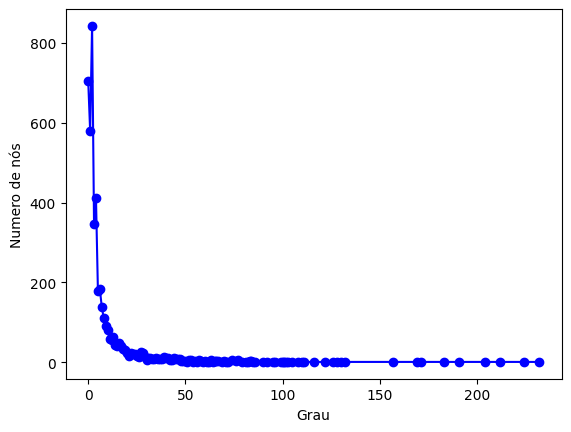

In [199]:
degree_distribution(G)

In [200]:
nx.average_clustering(G)

0.04489358044799769

In [201]:
def get_avg_degree(G):
    average_degree = (2 * G.number_of_edges() / G.number_of_nodes())
    return average_degree

In [202]:
get_avg_degree(G)

8.302076502732241

In [203]:
degrees = []
for deg in nx.degree(G):
    degrees.append(deg[1])

np.max(degrees)

232

In [204]:
pd.Series(degrees).value_counts()

2      842
0      705
1      579
4      412
3      346
6      183
5      179
7      138
8      111
9       91
10      82
13      63
11      58
12      56
16      48
14      44
15      41
17      41
18      34
19      30
27      25
28      24
20      24
22      23
24      21
23      20
25      17
21      16
26      14
39      13
29      13
32      12
41      11
40      11
44      11
31      10
35      10
46       9
38       9
47       9
45       9
37       8
33       8
36       8
34       8
43       7
30       7
74       6
52       6
63       5
53       5
77       5
42       5
57       5
58       4
70       4
50       4
60       4
48       4
55       4
66       4
65       3
76       3
84       3
83       3
67       3
49       3
56       2
81       2
62       2
64       2
51       2
59       2
72       2
96       2
102      2
92       1
79       1
122      1
128      1
61       1
105      1
85       1
116      1
232      1
90       1
69       1
212      1
71       1
157      1
110      1

In [205]:
categories = nx.get_node_attributes(G,'categories')

In [206]:
names = nx.get_node_attributes(G,'name')

In [207]:
df = pd.DataFrame()

In [208]:
df['Name'] = pd.Series(names)
df['Categories'] = pd.Series(categories)

In [209]:
df.head()

,Name,Categories
ql0AaBp68ckekxvWOF8xLA,Cafe Fifth Ave,"1,362"
WHxonk9W_sRLk8cwOoZQqQ,Good Fellas Barber Shop,"280,566"
P6HDtlj1GSu9UG2Aal2PPg,Tightspot Dancewear Center,"327,559,107,63,213"
3kUqNxO1rkDDb89GAfyNgw,Evolve Wellness Spa Shadyside,"338,280,247,292,671,546"
v_pED2nMFPsBGD4Tq2ygBw,Nova Dental Associates,"407,247,270,645,438,488"


In [210]:
df['Degree'] = [nx.degree(G)[label] for label in df.index]

In [211]:
df['Clustering coeff'] = [nx.clustering(G,label) for label in df.index]

In [212]:
df['Degree Centrality'] = [nx.degree_centrality(G)[label] for label in df.index]

In [213]:
df.reset_index(inplace=True)

In [214]:
df.rename(columns={'index':'label'},inplace=True)

In [223]:
df.head()

,label,Name,Categories,Degree,Clustering coeff,Degree Centrality,Categories Name
0,ql0AaBp68ckekxvWOF8xLA,Cafe Fifth Ave,"1,362",2,0.00000,0.000437,Restaurants
1,WHxonk9W_sRLk8cwOoZQqQ,Good Fellas Barber Shop,"280,566",2,0.00000,0.000437,NaN
2,P6HDtlj1GSu9UG2Aal2PPg,Tightspot Dancewear Center,"327,559,107,63,213",1,0.00000,0.000219,NaN
3,3kUqNxO1rkDDb89GAfyNgw,Evolve Wellness Spa Shadyside,"338,280,247,292,671,546",17,0.07619,0.003717,NaN
4,v_pED2nMFPsBGD4Tq2ygBw,Nova Dental Associates,"407,247,270,645,438,488",0,0.00000,0.000000,NaN


In [216]:
df_categories = pd.read_csv('categories.csv')

In [217]:
df_categories.head()

,CategoryId,names
0,0,Town Car Service
1,1,Restaurants
2,2,Wedding Planning
3,3,Professional Services
4,4,Comic Books


In [227]:
def separate_categories(column):
    for j in range(len(column)):
        categories = column[j].split(',')
        categories_name = []
        for c in categories:
            if not c == '':
                categories_name.append(df_categories.loc[int(c),'names'])
        df.loc[j,'Categories Name'] = ','.join(categories_name)

In [228]:
separate_categories(df['Categories'])

In [229]:
df.head()

,label,Name,Categories,Degree,Clustering coeff,Degree Centrality,Categories Name
0,ql0AaBp68ckekxvWOF8xLA,Cafe Fifth Ave,"1,362",2,0.00000,0.000437,"Restaurants,Cafes"
1,WHxonk9W_sRLk8cwOoZQqQ,Good Fellas Barber Shop,"280,566",2,0.00000,0.000437,"Beauty & Spas,Barbers"
2,P6HDtlj1GSu9UG2Aal2PPg,Tightspot Dancewear Center,"327,559,107,63,213",1,0.00000,0.000219,"Shopping,Arts & Crafts,Shoe Stores,Costumes,Fa..."
3,3kUqNxO1rkDDb89GAfyNgw,Evolve Wellness Spa Shadyside,"338,280,247,292,671,546",17,0.07619,0.003717,"Day Spas,Beauty & Spas,Health & Medical,Acupun..."
4,v_pED2nMFPsBGD4Tq2ygBw,Nova Dental Associates,"407,247,270,645,438,488",0,0.00000,0.000000,"Orthodontists,Health & Medical,General Dentist..."


In [238]:
df.sort_values(by='Clustering coeff',ascending=False)[:50]

,label,Name,Categories,Degree,Clustering coeff,Degree Centrality,Categories Name
2477,PIY7-b4i27sMg6ao0E5XVg,J'adore Cheveux Styles,"52,833,243,327,771,588,280,77",2,1.000000,0.000437,"Blow Dry/Out Services,Hair Salons,Hair Stylist..."
558,H5vlbkJ_8mFI1wCGHO3apg,Villa Italian Kitchen,"82,162,1,83,405",2,1.000000,0.000437,"Pizza,Breakfast & Brunch,Restaurants,Seafood,I..."
2664,albrwWP2nFfxZBb0gDuR_A,Kohl's - Robinson Township,"213,38,238,327,285,293,218,107,23",2,1.000000,0.000437,"Fashion,Toy Stores,Furniture Stores,Shopping,H..."
2001,i0PIIEFSQWHWC9IQXWj-WQ,Faster,"240,514,60,723,247,881,410",2,1.000000,0.000437,"Boot Camps,Gyms,Active Life,Weight Loss Center..."
1725,9zVzOY1ILeMSrqyDe8U99g,Gabriel Shoe Repair,"467,538",2,1.000000,0.000437,"Local Services,Shoe Repair"
453,q9FifZsp6jno13xnby1XnA,Clothes Minded,"327,213,382,23",2,1.000000,0.000437,"Shopping,Fashion,UsedVintageConsignment,Men's ..."
94,N7IWzVy-2t8qDKLLk81jXw,Shadyside Hideaway Bar,"58,333,275",2,1.000000,0.000437,"Nightlife,Dive Bars,Bars"
4180,BRZ1uct8SipLzxjEoZuC0A,Pittsburgh Banjo Club,"184,58,501,467,574",2,1.000000,0.000437,"Music Venues,Nightlife,Arts & Entertainment,Lo..."
1382,EY6o59A7qnlr1LxWpzdkiw,Shults Ford,"568,94,510,24",2,1.000000,0.000437,"Used Car Dealers,Car Dealers,Oil Change Statio..."
2611,Bi8p2JS1Om4PKpf6lRNWVg,PNC Bank,"350,383,839,74,522,681",2,1.000000,0.000437,"Mortgage Brokers,Real Estate,Home Services,Fin..."


In [239]:
df.sort_values(by='Degree Centrality',ascending=False)[:50]

,label,Name,Categories,Degree,Clustering coeff,Degree Centrality,Categories Name
4177,u4sTiCzVeIHZY8OlaL346Q,Gaucho Parrilla Argentina,"221,64,1,83",232,0.046592,0.050721,"Argentine,Latin American,Restaurants,Seafood"
2121,gldPX9ANF5Nic0N7igu2og,Condado Tacos,"1,393,275,208,58,651",224,0.042028,0.048972,"Restaurants,Tacos,Bars,Cocktail Bars,Nightlife..."
3813,dLc1d1zwd1Teu2QED5TmlA,Noodlehead,"370,1,620,641",212,0.045295,0.046349,"Thai,Restaurants,Noodles,Food"
1173,woXlprCuowrLJswWere3TQ,täkō,"1,420,651",204,0.055613,0.044600,"Restaurants,American (New),Mexican"
176,Voeq7aGDmCGMjE_SQiHwRA,Bakersfield,"58,275,393,208,420,83,651,1",191,0.053980,0.041758,"Nightlife,Bars,Tacos,Cocktail Bars,American (N..."
974,MKYcOZSpMwJK7uwacK13EA,Smallman Galley,"275,604,420,173,1,58,641",183,0.056506,0.040009,"Bars,American (Traditional),American (New),Cof..."
1978,JLbgvGM4FXh9zNP4O5ZWjQ,Meat & Potatoes,"428,641,262,490,420,1,188",171,0.066216,0.037385,"Meat Shops,Food,Specialty Food,Steakhouses,Ame..."
1415,BcLFIr4wtd3GQ3fnz15yDQ,DiAnoia's Eatery,"1,287,289,405",169,0.068682,0.036948,"Restaurants,Delis,Sandwiches,Italian"
3348,hHgSUnDB9yIrxUEMSmsdoQ,Piada Italian Street Food,"741,1,405,46",157,0.055886,0.034324,"Salad,Restaurants,Italian,Wraps"
951,4mYS-4UOjTKgsf0tX1_IkQ,Banh Mi & Ti,"1,362,857,204,641",132,0.061896,0.028859,"Restaurants,Cafes,Vietnamese,Bubble Tea,Food"
